In [1]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

import ndlib.models.epidemics.SISModel as sis

import random
import ndlib.models.epidemics.SIModel as si
import ndlib.models.ModelConfig as mc
import numpy as np
import pandas as pd

result_list={}
trend_list={}
output_list={}

no display found. Using non-interactive Agg backend


In [2]:
%matplotlib notebook

In [3]:
net_name='blogs'

In [4]:
file_name='../dataset/'+net_name
%run '../dataset/quick_process.py' {file_name}

In [5]:
def drawCutEdge(edgeList,G,method_name):
    node_final=[]
    len_edgeList=len(edgeList)
    for pct in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        temp=G.copy()
        if (G.number_of_edges()*pct>len_edgeList):break
        for i in range(round(G.number_of_edges()*pct)):
            temp.remove_edge(str(int(edgeList[i][0])),str(int(edgeList[i][1])))
        # Model selection
        model = sis(temp)
        # Model Configuration
        cfg = mc.Configuration()
        cfg.add_model_parameter('beta', 0.01)
        cfg.add_model_parameter('lambda', 0.005)
        cfg.add_model_parameter("percentage_infected", 0.05)
        model.set_initial_status(cfg)
        iterations = model.iteration_bunch(1000)
        trends = model.build_trends(iterations)
        viz = DiffusionTrend(model, trends)
#         viz.plot()
    
        node_final.append(trends[0]['trends']['node_count'][0][len(trends[0]['trends']['node_count'][0])-30]/G.number_of_nodes())
        trend_list[pct]=trends[0]['trends']['node_count'][0]


        print("pct of edge deleted:"+str(pct))
#     plt.show()
#     plt.ylim(0,1)
#     plt.plot(node_final)
    #result_list.append(node_final)
    result_list[method_name]=node_final
#     plt.show()
    

In [6]:
def drawCutNode(nodeList,G,method_name):
    node_final=[]
    temp=G.copy()
    edgeNum_raw=G.number_of_edges()
    edgeNum_pre=edgeNum_raw
    edgeNum_now=edgeNum_raw
    pct=1
    for i in range(len(nodeList[0])-1):
        edgeNum_pre=edgeNum_now
        temp.remove_node(str(int(nodeList[0][i])))
        #print(str(int(degree_centrality[0][i])))
        edgeNum_now=temp.number_of_edges()
        #print(edgeNum_now)
        if ((edgeNum_pre>(edgeNum_raw*0.9))&(edgeNum_now<(edgeNum_raw*0.9)))\
        |((edgeNum_pre>(edgeNum_raw*0.8))&(edgeNum_now<(edgeNum_raw*0.8)))\
        |((edgeNum_pre>(edgeNum_raw*0.7))&(edgeNum_now<(edgeNum_raw*0.7)))\
        |((edgeNum_pre>(edgeNum_raw*0.6))&(edgeNum_now<(edgeNum_raw*0.6)))\
        |((edgeNum_pre>(edgeNum_raw*0.5))&(edgeNum_now<(edgeNum_raw*0.5)))\
        |((edgeNum_pre>(edgeNum_raw*0.4))&(edgeNum_now<(edgeNum_raw*0.4)))\
        |((edgeNum_pre>(edgeNum_raw*0.3))&(edgeNum_now<(edgeNum_raw*0.3)))\
        |((edgeNum_pre>(edgeNum_raw*0.2))&(edgeNum_now<(edgeNum_raw*0.2)))\
        |((edgeNum_pre>(edgeNum_raw*0.1))&(edgeNum_now<(edgeNum_raw*0.1))):
            # Model selection
            model = sis(temp)
            # Model Configuration
            cfg = mc.Configuration()
            cfg.add_model_parameter('beta', 0.01)
            cfg.add_model_parameter('lambda', 0.005)
            cfg.add_model_parameter("percentage_infected", 0.05)
            model.set_initial_status(cfg)
            iterations = model.iteration_bunch(1000)

            trends = model.build_trends(iterations)
            viz = DiffusionTrend(model, trends)
#             viz.plot()
            node_final.append(trends[0]['trends']['node_count'][0][len(trends[0]['trends']['node_count'][0])-1]/G.number_of_nodes())
            #print(trends[0]['trends']['node_count'][0][len(trends[0]['trends']['node_count'][0])-1])
            
            
            trend_list[pct]=trends[0]['trends']['node_count'][0]
            pct=pct+1
        
            print("number of edge deleted:"+str(edgeNum_raw-edgeNum_now))
            if (edgeNum_now<(edgeNum_raw*0.1)):
                break
        #print('edgeNum_pre:'+str(edgeNum_pre)+',edgeNum_now:'+str(edgeNum_now))
#     plt.show()
#     plt.plot(node_final)
    #result_list.append(node_final)
    result_list[method_name]=node_final
#     plt.ylim(0,1)
#     plt.show()

In [7]:
def motif_computation(m_num,W):
    B=np.multiply(W,W.T)
    U=W-B
    if m_num==1:
        C=np.multiply(U*U,U.T)
        C=C+C.T
    elif m_num==2:
        C=np.multiply(B*U,U.T)+np.multiply(U*B,U.T)+np.multiply(U*U,B)
        C=C+C.T
    elif m_num==3:
        C=np.multiply(B*B,U)+np.multiply(B*U,B)+np.multiply(U*B,B)
        C=C+C.T
    elif m_num==4:
        C=np.multiply(B*B,B)
    elif m_num==5:
        C=np.multiply(U*U,U)+np.multiply(U*U.T,U)+np.multiply(U.T*U,U)
        C=C+C.T
    elif m_num==6:
        C=np.multiply(U*B,U)+np.multiply(B*U.T,U.T)+np.multiply(U.T*U,B)
    elif m_num==7:
        C=np.multiply(U.T*B,U.T)+np.multiply(B*U,U)+np.multiply(U*U.T,B)
    return C

In [8]:
'''
Here it is necessary to record the processing methods of different network formats:

-If the original file is txt, use quickprocess.py to get txt and weighted txt
-If the original file is gml, use Gephi to get the csv
-If the original file is csv, use Atom to delete the comma and save as txt
'''

'\nHere it is necessary to record the processing methods of different network formats:\n\n-If the original file is txt, use quickprocess.py to get txt and weighted txt\n-If the original file is gml, use Gephi to get the csv\n-If the original file is csv, use Atom to delete the comma and save as txt\n'

In [9]:
G=nx.DiGraph()
G = nx.read_edgelist('../dataset/'+net_name+'.csv', delimiter=',', nodetype=str,create_using=G)

In [10]:
'''
Algorithm idea：
- Combine the weight of motif with edge betweenness
'''

'\nAlgorithm idea：\n- Combine the weight of motif with edge betweenness\n'

In [11]:
# Use motif to weight edges
W=nx.to_numpy_matrix(G)

# Type of input motif

C=motif_computation(4,W)
W_M=np.multiply(1/(C+1),W)

edgeList=list(G.edges())

G_weighted=nx.DiGraph()

In [12]:
for item in edgeList:
    a=list(G.nodes()).index(item[0])
    b=list(G.nodes()).index(item[1])
    G_weighted.add_edge(str(a),str(b),weight=W_M[a,b])

In [13]:
edge_betweenness_w=nx.edge_betweenness_centrality(G_weighted,weight='weight')

In [14]:
edge_betweenness_ws=sorted(edge_betweenness_w.items(),key=lambda item:item[1],reverse=True)

In [15]:
f=open('../centralities/'+net_name+'edge_betweenness_w.txt','w')

In [16]:
for item in edge_betweenness_ws:
    f.write(str(item[0][0])+' '+str(item[0][1])+' '+str(item[1])+'\n')
f.close()
del edge_betweenness_w,edge_betweenness_ws

In [17]:
edge_betweenness_w=pd.read_csv('../centralities/'+net_name+'edge_betweenness_w.txt',header=None,sep=' ')

In [18]:
edge_betweenness_w=np.array(edge_betweenness_w)
edge_betweenness_w=edge_betweenness_w.tolist()

drawCutEdge(edge_betweenness_w,G_weighted,'edge_betweenness_w edge')
del edge_betweenness_w

  2%|▏         | 21/1000 [00:00<00:04, 201.19it/s]

pct of edge deleted:0.1


  4%|▍         | 43/1000 [00:00<00:04, 207.73it/s]

pct of edge deleted:0.2


  4%|▍         | 42/1000 [00:00<00:04, 205.51it/s]

pct of edge deleted:0.3


  2%|▏         | 21/1000 [00:00<00:04, 206.92it/s]

pct of edge deleted:0.4


  2%|▏         | 22/1000 [00:00<00:04, 219.53it/s]

pct of edge deleted:0.5


  2%|▏         | 23/1000 [00:00<00:04, 223.10it/s]

pct of edge deleted:0.6


  2%|▏         | 23/1000 [00:00<00:04, 224.83it/s]

pct of edge deleted:0.7


  2%|▏         | 23/1000 [00:00<00:04, 229.29it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 230.71it/s]

pct of edge deleted:0.9


In [19]:
f=open('../output/'+net_name+'edge_betweenness_w'+'_infected_num'+'.txt','w')
f.write(str(trend_list))
f.close()
output_list['edge_betweenness_w']=trend_list
trend_list={}

In [20]:
f=open('../output/'+net_name+'edge_betweenness_w'+'_infected_num'+'.txt','r')
dic=eval(f.read())
f.close()

In [21]:
# The effect of original edge-betweenness
%run Centralities.py {net_name}

degree...
closeness...
betweenness...


In [22]:
# Remove nodes based on degree, compare with the situation where the same edge is removed

In [23]:
degree_centrality=pd.read_csv('../centralities/'+net_name+'degree.txt',header=None,sep=',')
degree_centrality=np.array(degree_centrality)
degree_centrality=degree_centrality.tolist()

In [24]:
drawCutNode(degree_centrality,G,'degree node')
del degree_centrality

  2%|▏         | 21/1000 [00:00<00:04, 204.08it/s]

number of edge deleted:2088


  4%|▍         | 43/1000 [00:00<00:04, 210.99it/s]

number of edge deleted:3834


  2%|▏         | 22/1000 [00:00<00:04, 218.01it/s]

number of edge deleted:5833


  5%|▍         | 46/1000 [00:00<00:04, 223.05it/s]

number of edge deleted:9564


  5%|▍         | 48/1000 [00:00<00:04, 236.78it/s]

number of edge deleted:11459


  3%|▎         | 26/1000 [00:00<00:03, 259.04it/s]

number of edge deleted:13355


  6%|▌         | 58/1000 [00:00<00:03, 281.54it/s]

number of edge deleted:15235


100%|██████████| 1000/1000 [00:03<00:00, 292.78it/s]

number of edge deleted:17125


In [25]:
f=open('../output/'+net_name+'degree'+'_infected_num'+'.txt','w')
f.write(str(trend_list))
f.close()
output_list['degree']=trend_list
trend_list={}

In [26]:
### 依据betweenness删去节点，与相同的情形比较
# Delete nodes based on betweenness and compare with the same situation

In [27]:
betweenness=pd.read_csv('../centralities/'+net_name+'betweenness.txt',header=None,sep=',')
betweenness=np.array(betweenness)
betweenness=betweenness.tolist()

In [28]:
drawCutNode(betweenness,G,'betweenness node')
del betweenness

  2%|▏         | 21/1000 [00:00<00:04, 203.03it/s]

number of edge deleted:2118


  2%|▏         | 21/1000 [00:00<00:04, 202.39it/s]

number of edge deleted:4001


  2%|▏         | 21/1000 [00:00<00:04, 209.01it/s]

number of edge deleted:5737


  2%|▏         | 22/1000 [00:00<00:04, 216.63it/s]

number of edge deleted:7714


  2%|▏         | 24/1000 [00:00<00:04, 230.46it/s]

number of edge deleted:9523


  2%|▎         | 25/1000 [00:00<00:03, 245.56it/s]

number of edge deleted:11422


  5%|▌         | 54/1000 [00:00<00:03, 259.31it/s]

number of edge deleted:13345


  3%|▎         | 32/1000 [00:00<00:03, 314.90it/s]

number of edge deleted:15231


100%|██████████| 1000/1000 [00:03<00:00, 317.88it/s]

number of edge deleted:17128


In [29]:
f=open('../output/'+net_name+'betweenness'+'_infected_num'+'.txt','w')
f.write(str(trend_list))
f.close()
output_list['betweenness']=trend_list
trend_list={}

### 将各个方法的效果汇总

In [30]:
result_list

{'edge_betweenness_w edge': [0.4803921568627451,
  0.5024509803921569,
  0.5612745098039216,
  0.5972222222222222,
  0.6625816993464052,
  0.7132352941176471,
  0.7565359477124183,
  0.821078431372549,
  0.8594771241830066],
 'degree node': [0.3611111111111111,
  0.3741830065359477,
  0.39052287581699346,
  0.41094771241830064,
  0.43300653594771243,
  0.4877450980392157,
  0.5081699346405228,
  0.5866013071895425],
 'betweenness node': [0.36519607843137253,
  0.4035947712418301,
  0.4158496732026144,
  0.4272875816993464,
  0.4583333333333333,
  0.4877450980392157,
  0.5294117647058824,
  0.5727124183006536,
  0.690359477124183]}

<IPython.core.display.Javascript object>


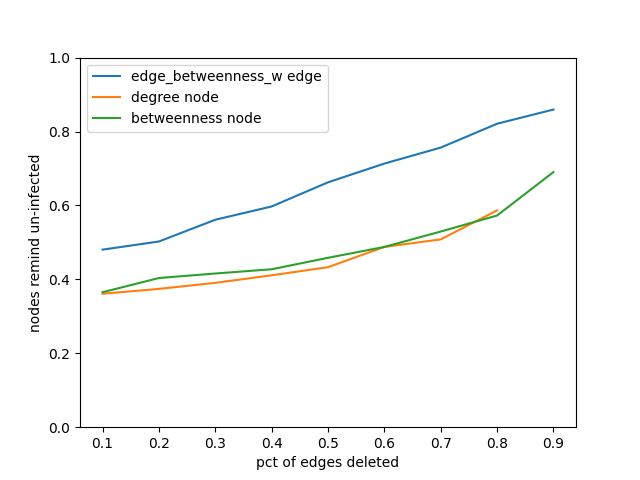

In [31]:

for method_name in list(result_list.keys()):
    plt.plot([x/10 for x in list(range(1,(len(result_list[method_name])+1),1))],result_list[method_name],label=method_name)

plt.ylim(0,1)
plt.xlabel('pct of edges deleted')
plt.ylabel('nodes remind un-infected')
plt.legend()
plt.show()
    

# Comparison of Motifs

In [32]:
W=nx.to_numpy_matrix(G)

In [33]:
k=1

In [34]:
for m in [1,2,3,4,5,6,7]:
    C=motif_computation(m,W)
    W_M=np.multiply(1/(C+1),W)

    edgeList=list(G.edges())

    G_weighted=nx.DiGraph()

    for item in edgeList:
        a=list(G.nodes()).index(item[0])
        b=list(G.nodes()).index(item[1])
        G_weighted.add_edge(a,b,weight=W_M[a,b])

    np.sort(list(G_weighted.nodes()))

    len(G.nodes())

    edge_betweenness_w=nx.edge_betweenness_centrality(G,weight='weight')

    edge_betweenness_ws=sorted(edge_betweenness_w.items(),key=lambda item:item[1],reverse=True)

    f=open('../centralities/'+net_name+'M'+str(m)+'.txt','w')

    for item in edge_betweenness_ws:
        f.write(item[0][0]+' '+item[0][1]+' '+str(item[1])+'\n')
    f.close()
    del edge_betweenness_w,edge_betweenness_ws
    
    tmp='M'+str(m)

    edge_betweenness_w=pd.read_csv('../centralities/'+net_name+'M'+str(m)+'.txt',header=None,sep=' ')

    edge_betweenness_w=np.array(edge_betweenness_w)
    edge_betweenness_w=edge_betweenness_w.tolist()

    drawCutEdge(edge_betweenness_w,G,tmp)
    del edge_betweenness_w

    f=open('../output/'+net_name+'M'+str(m)+'.txt','w')
    f.write(str(trend_list))
    f.close()
    output_list['M'+str(m)]=trend_list
    trend_list={}
    k=k+1

  2%|▏         | 21/1000 [00:00<00:04, 205.66it/s]

pct of edge deleted:0.1


  4%|▍         | 45/1000 [00:00<00:04, 219.50it/s]

pct of edge deleted:0.2


  2%|▏         | 21/1000 [00:00<00:04, 207.33it/s]

pct of edge deleted:0.3


  2%|▏         | 22/1000 [00:00<00:04, 216.73it/s]

pct of edge deleted:0.4


  2%|▏         | 21/1000 [00:00<00:04, 209.96it/s]

pct of edge deleted:0.5


  2%|▏         | 23/1000 [00:00<00:04, 223.13it/s]

pct of edge deleted:0.6


  2%|▏         | 24/1000 [00:00<00:04, 232.70it/s]

pct of edge deleted:0.7


  2%|▎         | 25/1000 [00:00<00:04, 240.67it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 234.05it/s]


pct of edge deleted:0.9


  4%|▍         | 41/1000 [00:00<00:04, 203.46it/s]

pct of edge deleted:0.1


  2%|▏         | 21/1000 [00:00<00:04, 201.57it/s]

pct of edge deleted:0.2


  2%|▏         | 21/1000 [00:00<00:04, 200.94it/s]

pct of edge deleted:0.3


  2%|▏         | 22/1000 [00:00<00:04, 213.26it/s]

pct of edge deleted:0.4


  2%|▏         | 22/1000 [00:00<00:04, 213.83it/s]

pct of edge deleted:0.5


  2%|▏         | 22/1000 [00:00<00:04, 215.05it/s]

pct of edge deleted:0.6


  2%|▏         | 23/1000 [00:00<00:04, 227.97it/s]

pct of edge deleted:0.7


  2%|▏         | 24/1000 [00:00<00:04, 235.97it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 229.34it/s]


pct of edge deleted:0.9


  2%|▏         | 20/1000 [00:00<00:04, 198.99it/s]

pct of edge deleted:0.1


  4%|▍         | 42/1000 [00:00<00:04, 202.52it/s]

pct of edge deleted:0.2


  2%|▏         | 21/1000 [00:00<00:04, 207.25it/s]

pct of edge deleted:0.3


  4%|▍         | 42/1000 [00:00<00:04, 208.10it/s]

pct of edge deleted:0.4


  2%|▏         | 23/1000 [00:00<00:04, 220.47it/s]

pct of edge deleted:0.5


  2%|▏         | 23/1000 [00:00<00:04, 224.94it/s]

pct of edge deleted:0.6


  2%|▏         | 24/1000 [00:00<00:04, 237.67it/s]

pct of edge deleted:0.7


  3%|▎         | 26/1000 [00:00<00:03, 250.50it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 234.36it/s]


pct of edge deleted:0.9


  4%|▍         | 43/1000 [00:00<00:04, 210.67it/s]

pct of edge deleted:0.1


  2%|▏         | 21/1000 [00:00<00:04, 204.11it/s]

pct of edge deleted:0.2


  2%|▏         | 20/1000 [00:00<00:05, 195.05it/s]

pct of edge deleted:0.3


  2%|▏         | 22/1000 [00:00<00:04, 211.80it/s]

pct of edge deleted:0.4


  2%|▏         | 21/1000 [00:00<00:04, 206.68it/s]

pct of edge deleted:0.5


  2%|▏         | 23/1000 [00:00<00:04, 224.26it/s]

pct of edge deleted:0.6


  2%|▏         | 24/1000 [00:00<00:04, 232.08it/s]

pct of edge deleted:0.7


  2%|▏         | 24/1000 [00:00<00:04, 238.88it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 233.60it/s]


pct of edge deleted:0.9


  2%|▏         | 21/1000 [00:00<00:04, 202.54it/s]

pct of edge deleted:0.1


  4%|▍         | 43/1000 [00:00<00:04, 208.78it/s]

pct of edge deleted:0.2


  2%|▏         | 22/1000 [00:00<00:04, 212.03it/s]

pct of edge deleted:0.3


  2%|▏         | 22/1000 [00:00<00:04, 211.21it/s]

pct of edge deleted:0.4


  2%|▏         | 23/1000 [00:00<00:04, 220.31it/s]

pct of edge deleted:0.5


  2%|▏         | 23/1000 [00:00<00:04, 222.46it/s]

pct of edge deleted:0.6


  2%|▏         | 22/1000 [00:00<00:04, 216.73it/s]

pct of edge deleted:0.7


  2%|▎         | 25/1000 [00:00<00:03, 249.68it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 235.92it/s]


pct of edge deleted:0.9


  4%|▍         | 43/1000 [00:00<00:04, 209.32it/s]

pct of edge deleted:0.1


  2%|▏         | 21/1000 [00:00<00:04, 207.79it/s]

pct of edge deleted:0.2


  2%|▏         | 21/1000 [00:00<00:04, 206.48it/s]

pct of edge deleted:0.3


  2%|▏         | 22/1000 [00:00<00:04, 210.55it/s]

pct of edge deleted:0.4


  2%|▏         | 23/1000 [00:00<00:04, 229.55it/s]

pct of edge deleted:0.5


  2%|▏         | 22/1000 [00:00<00:04, 218.05it/s]

pct of edge deleted:0.6


  2%|▏         | 24/1000 [00:00<00:04, 237.34it/s]

pct of edge deleted:0.7


  2%|▎         | 25/1000 [00:00<00:03, 248.56it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 240.13it/s]


pct of edge deleted:0.9


  4%|▍         | 43/1000 [00:00<00:04, 214.41it/s]

pct of edge deleted:0.1


  4%|▍         | 43/1000 [00:00<00:04, 213.06it/s]

pct of edge deleted:0.2


  4%|▍         | 44/1000 [00:00<00:04, 215.28it/s]

pct of edge deleted:0.3


  2%|▏         | 23/1000 [00:00<00:04, 221.53it/s]

pct of edge deleted:0.4


  5%|▍         | 46/1000 [00:00<00:04, 220.13it/s]

pct of edge deleted:0.5


  2%|▏         | 22/1000 [00:00<00:04, 219.81it/s]

pct of edge deleted:0.6


  2%|▏         | 24/1000 [00:00<00:04, 237.82it/s]

pct of edge deleted:0.7


  2%|▏         | 24/1000 [00:00<00:04, 238.42it/s]

pct of edge deleted:0.8


100%|██████████| 1000/1000 [00:04<00:00, 232.20it/s]

pct of edge deleted:0.9
